
..**New York City AirBnb** <br>
Lab 3: Clustering<br>
*Bravo, Karba, Kimari, Salsman*

# Business Understanding<br>
<small>*Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?*</small>


**Purpose of dataset collected; why collected**

<blockquote>The purpose of the dataset as it was presented on kaggle was in the context of investigating the listing activity and metrics for Airbnb.com in New York City, 2019. Airbnb is a service where hosts and guests can make or discover traveling solutions.The content of the data includes most pertinent metrics necessary to make predictions and draw conclusions. Airbnb collects this data because it is integral to the functioning of their applications, supported from it's relational databases. All of the data was either manually entered by hosts or calculated from processes such as GPS or other data created by the application. We selected this dataset because Airbnb is a well-known mainstream internet company that has revolutionized the hotel industry with technology and grassroots efforts. Furthermore, a look into the Airbnb data allows us to get a sense of the market for Airbnb listings. Understanding the market better can have a positive impact on many different sectors. Realitors and homesellers can factor in the potential for the new homeowners who may be interested in leasing out their homes in order to earn extra capital. Vice versa potential home buyers/landlords could use this information to see extra value in property they wish to purchase with the intent on leasing through Airbnb. Finally, users on the Airbnb app could use this knowledge to gage whether they are getting a fair deal on their booking. 
</blockquote>

**How we will measure effectiveness of good algorithm**
<blockquote>
The goal is to predict price based on the other attributes from the Airbnb dataset. This will give us the best understanding of how the market works and how to take advantage of it. In this research we are creating a categorical variable from price called 'hotel_listing' which bins price at 300 into either high or low. 300 is the average price for a hotel in New York City. Those classified as High set their price above the average NYC hotel and vice versa for Low. This cutoff makes sense because landlords would be able to know if they can/should set their price above their greatest competitor (hotels) or if they should set price below this threshold. We are going to perform clustering on feature to feature relationships and then labels these clusters and use these new cluster IDs as features in our classifier. Due to the nature of clustering and the consensus that cluster validation is in the eye of the beholder we will hope globularity on a visual plot of Sum Square Error. After selecting the clusters we will run a Random Forest classifier with our new features and compare it to our Random Forest classifier on the original, unclustered data. 

Our metrics for measuring the classifier will be Accuracy, Recall, and Precision. A good algorthim will have not just high accuracy but also high recall and precision as well. It is not simply enough to just be acccurate as a high proportion of observations are listed as low hotel_listing. It is important that our algorithm is also reliably classifying. Recall is the true positive rate, in other words when the hotel_listing is actually 'high' what percent of that is our algorithm getting correct. Precision is the total positive divided by total positive plus false positive. In our data set this would how many times we *correctly* classify hotel_listing as 'high' over the total amount of times we classified hotel_quality. Getting high scores on these metrics would mean that our algorithm is actually using information on the data set to learn which features or associations that cause Airbnb listings to be above the average hotel cost.

Finally, for further research it is also important to know which features are important. This gives us a better inference on the market.
</blockquote>

**Why chosen validation makes sense for specific dataset, stakeholders needs?**
<blockquote>
The Sum Square Error for cluster validation makes sense for New York City because because we are anticipating many clusters in the subset of our feature space (which may be too complex for an observable correlation matrix). This validation method makes sense for stakeholders that will be able to observe a clear SSE plot and come to an agreement with the clustering solution that will follow what is most sensible for a city as vast and variable of demand for New York City.

For measuring our classifiers we will use 10-fold stratified cross validation. It is important to use to know that during each fold the proportions of the classes are close to equal. We fold 10 times in order to find the average of our metrics over 10 different test train splits. The average of our metrics should give us a reliable view of how our classifier is performing. Since stakeholders would like assurance and reliability we feel that giving the average metrics of 10 folds is the best way to achieve that.
</blockquote>

# Data Understanding 1<br>
<small>*Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?*</small>

## Meaning and Type of Data



**id** – a unique property integer associated with each separate property listed. This is unique for each observation within the dataset.

**name**- a set of strings representing the name given by the owner’(s) to each property.

**host_id**- a unique integer associated with each host. This is not unique to each observation because a host can have more than one property.

**host_name**- a string representing the name of the host.

**neighbourhood_group**- a string representing which borough the property is in.

**neighbourhood**- a string representing which district the property is in. 

Districts are unique to certain boroughs (neighbourhood_group).

**latitude**- a float number that is the latitude coordinate for the property.

**longitude**- a float number that is the longitude coordinate for the property.

**room_type**- a string object with three different levels.

**price**- a positive integer representing the cost of each property in U.S. dollars.

**minimum_nights**- a positive integer representing the least amount of nights that are required to stay to book the property.

**number_of_reviews**- an integer that totals the amount of reviews left for a specific listing on Airbnb.

**last_review**- The date expressed as numbers written year, month, day. NaN is used if there are zero reviews of a listing.

**reviews_per_month**- a float that averages the amount of reviews a listing has received by the number of months it has been listed on Airbnb. Nan If there are zero reviews.

**calculated_host_listings_count**- an integer for each separate listing for each host.

**availability_365**- an integer, from 0 to 365, that represents the amount of days each listing is available for that year. 

**great_listing** - a float from 0 to .7 (or non-zero) that combines a calculation of two features, review rate and availability, to value if a property is a great listing and has demand. 

**hotel_quality** - a binary integer (0,1) value that is calculated by binning the price variable at 0-299.99 = 0, and 300+ = 1. 300 was chosen as the cutoff as it is the average price of a hotel in NYC

*Note - A .describe() below gives a more complete summary of the data.*

## Scale, Values of Data

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'https://raw.githubusercontent.com/thomaskarba/MachineLearningSMU/master/AB_NYC_2019.csv')

#preparing data, class
if 'price' in data.columns:
  data['hotel_quality'] = data.price>=300
  data.hotel_quality=data.hotel_quality.astype(np.int) 

# new feature - great_listing
data['reviews_per_month']=data['reviews_per_month'].fillna(0)
data['review_rate']=data['reviews_per_month']/30.0+.0001
data['wanted_yr_rate']=(1-data['availability_365']/365.0)
data['great_listing'] = data['review_rate']*data['wanted_yr_rate']
if 'review_rate' in data:
  del data['review_rate']
if 'wanted_yr_rate' in data:
  del data['wanted_yr_rate']

#CLF: removed columns that are not useful 
for item in ['id','last_review','name','host_id','host_name']:
  if item in data.columns:
    del data[item]
 
data.info(verbose=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  hotel_quality                   48895 non-null  int64  
 12  great_listing                   

Data is imported, target feature hotel_quality created, great_listing feature created, useless features removed.

In [ ]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,hotel_quality,great_listing
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,0.080131,0.022053
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.271499,0.037014
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000459
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000,0.006036
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,0.000000,0.027100
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000,0.611531


In the data summary we note the standard deviation and quartiles across the numeric features which tell us the data does need to be scaled.

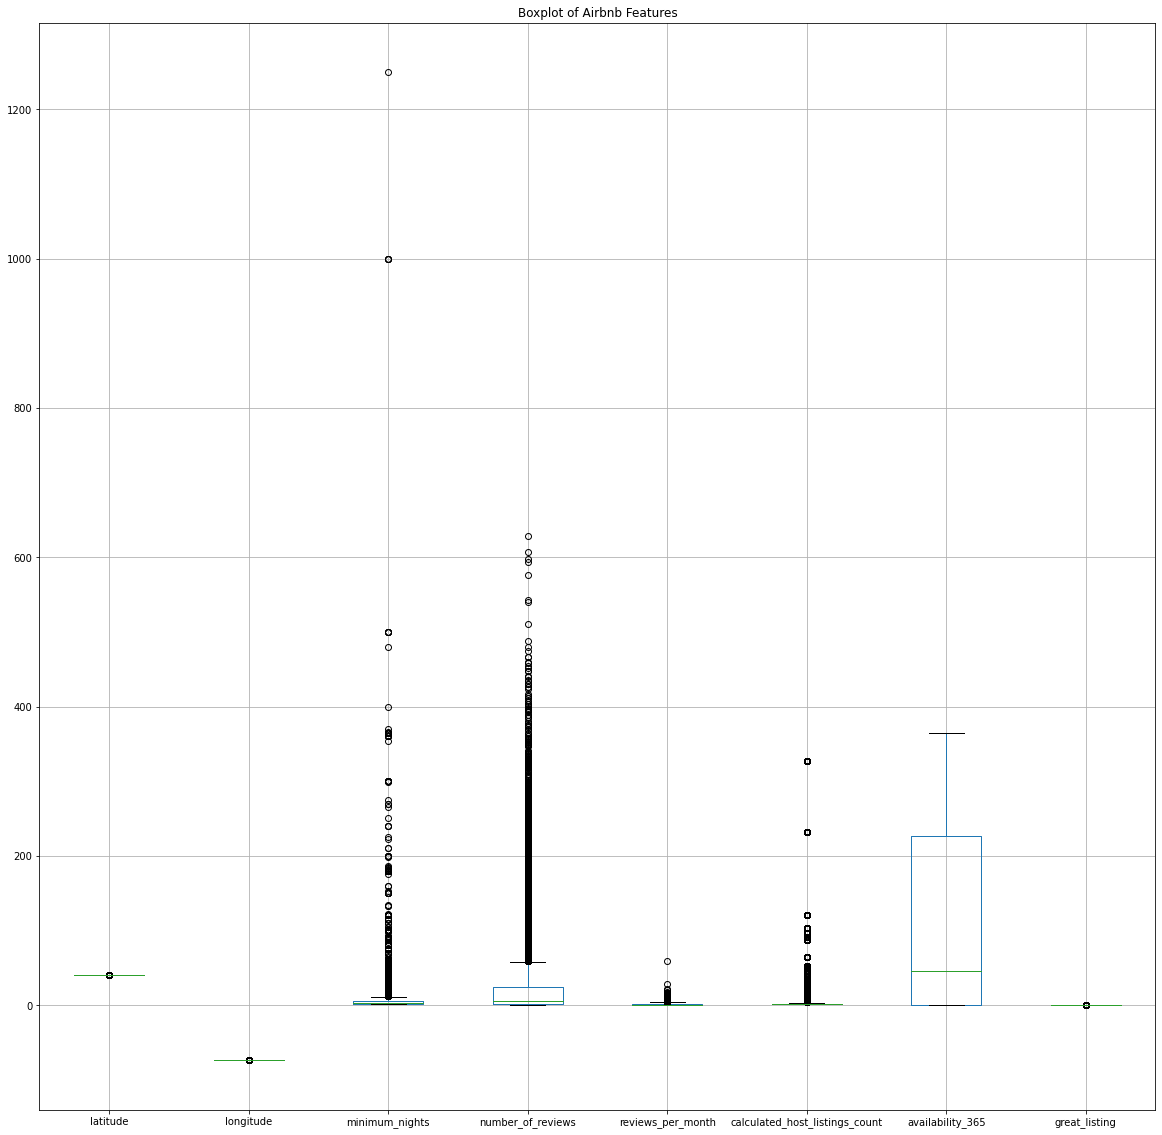

In [ ]:
import matplotlib.pyplot as plt  
data.boxplot(column = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','great_listing'],figsize=(20,20))
title_boxplot = 'Boxplot of Airbnb Features'
plt.title( title_boxplot )
plt.show()

The boxplots show us the distribution from the table above. We can see that latitude, longitude, availability_365, and great_listing do not have outliers. Reviews_per_month has a few, but not too extreme outliers. Minimum_nights, number_of_reviews, and calculated_host_listings_count all have noticeable outliers which could cause an effect. Since we are performing clustering on the features so things like DBScan could be able to cut through the noise of these outliers. Furthermore, we are performing Random Forest Classication which is fairly robust to outliers in large datasets. Finally, price is omitted from this as this feature will be binned, high and low, into hotel_listing so outliers will not be an issue.

In [ ]:
data.isna().any()

neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
hotel_quality                     False
great_listing                     False
dtype: bool

No missing values in the data.

In [ ]:
print('Are there any duplicate rows overall? ', df.duplicated().any())

for col in list(df.columns.values.tolist()):
  print('Duplicate values in ', col, ': ', df[col].duplicated().any())


  

Are there any duplicate rows overall?  False
Duplicate values in  name :  True
Duplicate values in  host_name :  True
Duplicate values in  neighbourhood_group :  True
Duplicate values in  neighbourhood :  True
Duplicate values in  room_type :  True
Duplicate values in  price :  True
Duplicate values in  minimum_nights :  True
Duplicate values in  number_of_reviews :  True
Duplicate values in  last_review :  True
Duplicate values in  reviews_per_month :  True
Duplicate values in  calculated_host_listings_count :  True
Duplicate values in  availability_365 :  True


There are no duplicate complete rows in our dataset. Each individual column does have duplicate values, but that is acceptable because it is expected for this type of data to have duplicate values. 

## Data Preparation

In [ ]:
# dummies
if 'burrow_Bronx' not in data.columns:
  burrows = pd.get_dummies(data.neighbourhood_group,prefix='burrow')
  data = pd.concat((data,burrows),axis=1)
if 'hood_Woodside' not in data.columns:
  hood = pd.get_dummies(data.neighbourhood,prefix='hood')
  data = pd.concat((data,hood),axis=1)
if 'type_Private room' not in data.columns:
  roomtype = pd.get_dummies(data.room_type,prefix='type')
  data = pd.concat((data,roomtype),axis=1)


#replace room type data with a numeric value  
#data.room_type = data.room_type.replace(to_replace={'Private room':0,
 #                                                   'Entire home/apt':1,
  #                                                 'Shared room':2})

# removing original dummied features
for item in ['neighbourhood_group','neighbourhood','price','room_type']:
  if item in data.columns:
    del data[item]
# removing one of dummy variables
if 'burrow_Staten Island' in data:
  del data['burrow_Staten Island']
if 'hood_Allerton' in data:
  del data['hood_Allerton']
if 'type_Shared room' in data:
  del data['type_Shared room']

# reference dummies are burrow:Staten Island, neighborhood: Allerton, room_type: Shared room

if 'hotel_quality' in data.columns:
  y = data['hotel_quality'].values # get the labels we want
  del data['hotel_quality'] # get rid of the class label
  X = data.values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_Xc = scaler.transform(X)
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 234 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   latitude                         float64
 1   longitude                        float64
 2   minimum_nights                   int64  
 3   number_of_reviews                int64  
 4   reviews_per_month                float64
 5   calculated_host_listings_count   int64  
 6   availability_365                 int64  
 7   great_listing                    float64
 8   burrow_Bronx                     uint8  
 9   burrow_Brooklyn                  uint8  
 10  burrow_Manhattan                 uint8  
 11  burrow_Queens                    uint8  
 12  hood_Arden Heights               uint8  
 13  hood_Arrochar                    uint8  
 14  hood_Arverne                     uint8  
 15  hood_Astoria                     uint8  
 16  hood_Bath Beach                  uint8  
 17  hood_Batter

Preparing the data for clustering and classification task. Classes are one-hot encoded and data is scaled.

# Data Understanding 2<br>
<small>*Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.*</small>

Visualization

In [ ]:
Xlist=[]
for col in data.columns:
  if col.startswith('burrow') == False and col.startswith('hood')==False and col.startswith('type')==False:
    Xlist.append(col)
cross=[]
for feature in Xlist:
  for i in range(0,len(Xlist)):
    empty=[]
    if feature != Xlist[i]:
      empty.append(feature)
      empty.append(Xlist[i])
      cross.append(empty)
print(cross)

[['latitude', 'longitude'], ['latitude', 'minimum_nights'], ['latitude', 'number_of_reviews'], ['latitude', 'reviews_per_month'], ['latitude', 'calculated_host_listings_count'], ['latitude', 'availability_365'], ['latitude', 'great_listing'], ['longitude', 'latitude'], ['longitude', 'minimum_nights'], ['longitude', 'number_of_reviews'], ['longitude', 'reviews_per_month'], ['longitude', 'calculated_host_listings_count'], ['longitude', 'availability_365'], ['longitude', 'great_listing'], ['minimum_nights', 'latitude'], ['minimum_nights', 'longitude'], ['minimum_nights', 'number_of_reviews'], ['minimum_nights', 'reviews_per_month'], ['minimum_nights', 'calculated_host_listings_count'], ['minimum_nights', 'availability_365'], ['minimum_nights', 'great_listing'], ['number_of_reviews', 'latitude'], ['number_of_reviews', 'longitude'], ['number_of_reviews', 'minimum_nights'], ['number_of_reviews', 'reviews_per_month'], ['number_of_reviews', 'calculated_host_listings_count'], ['number_of_review

Creates a list of lists with two feature combinations of the remaining pertinent features to visualize.

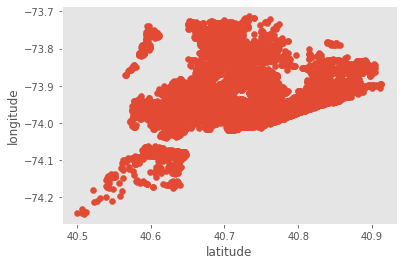

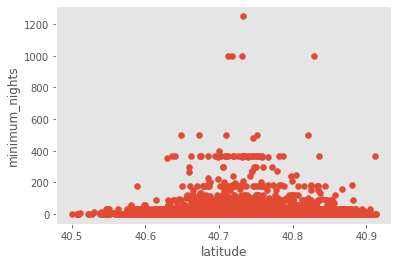

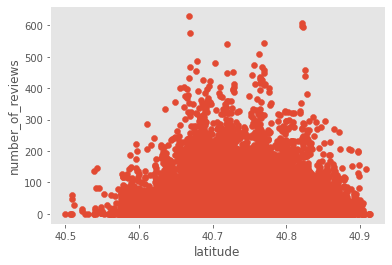

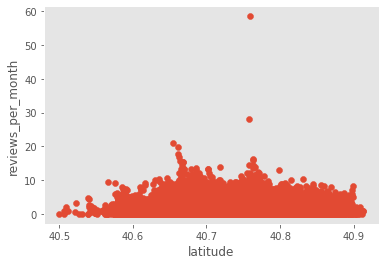

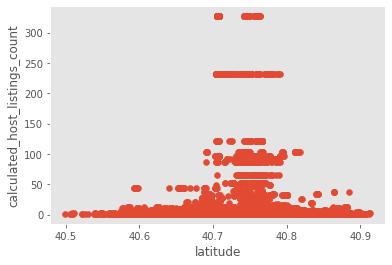

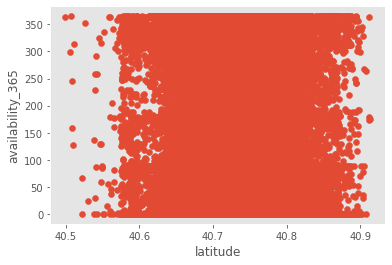

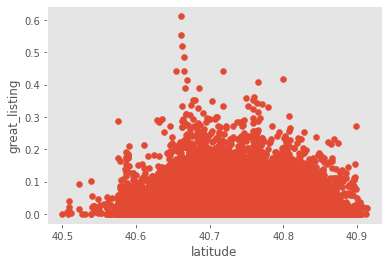

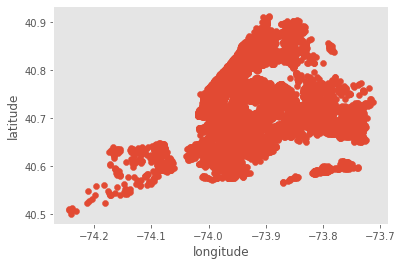

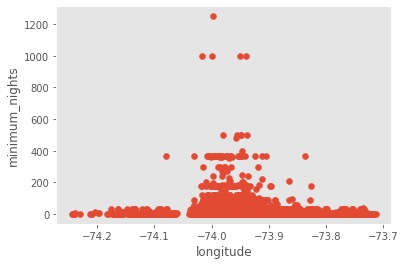

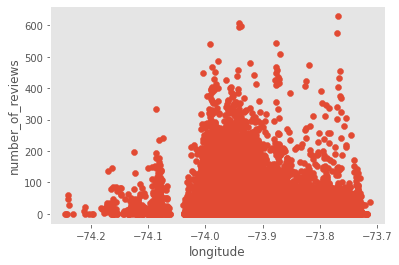

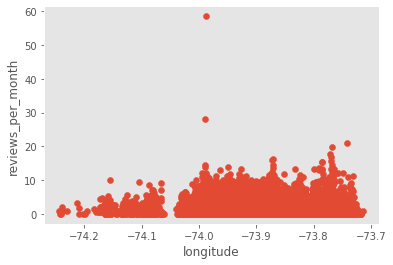

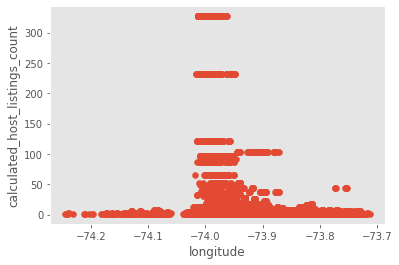

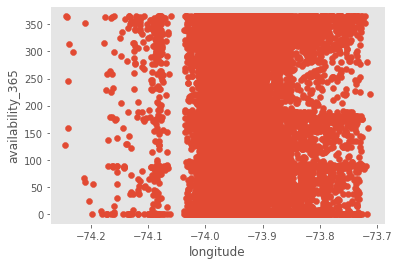

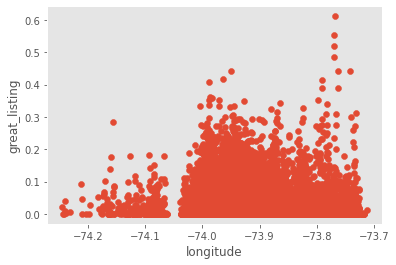

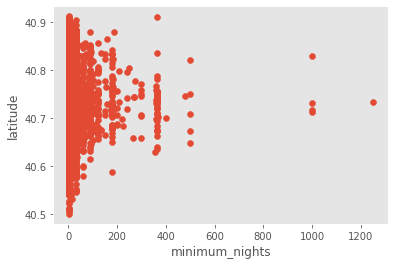

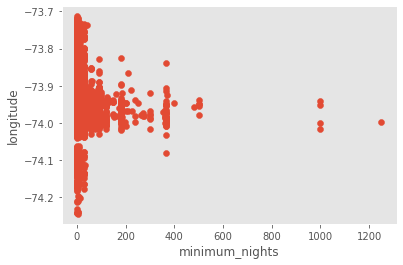

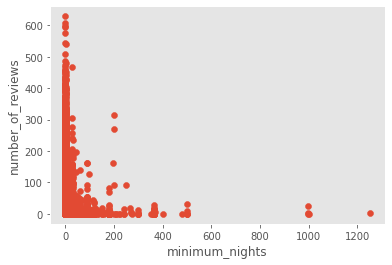

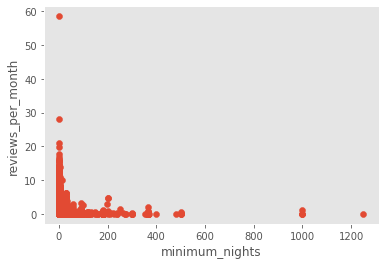

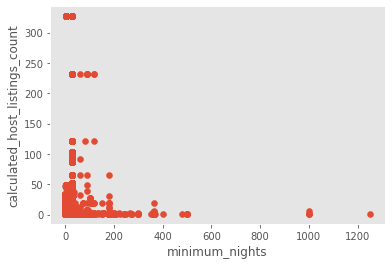

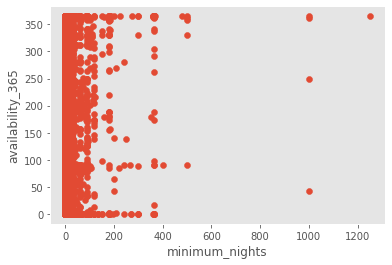

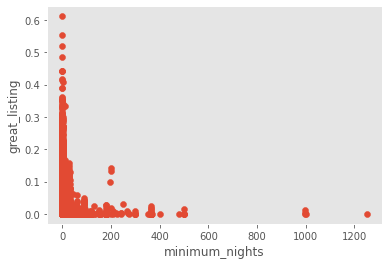

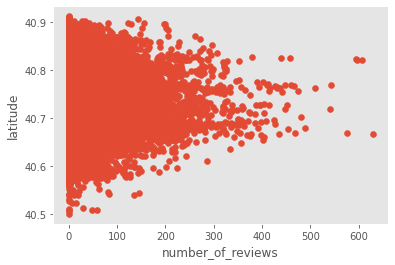

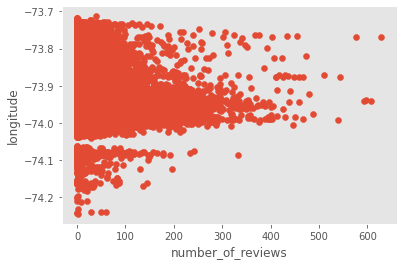

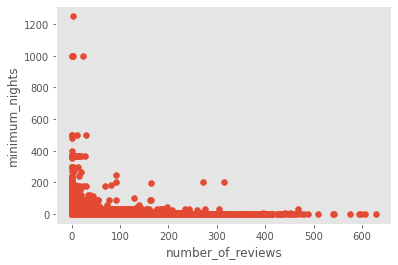

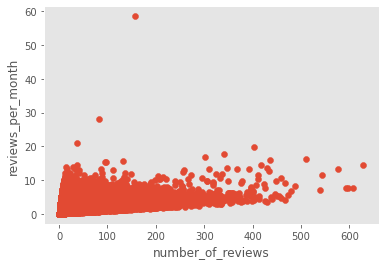

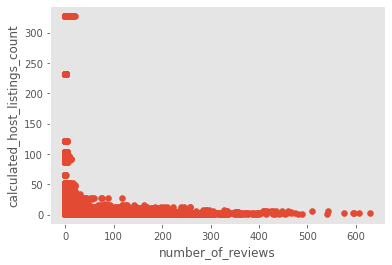

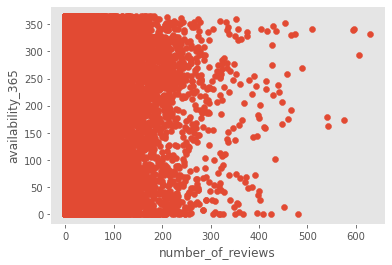

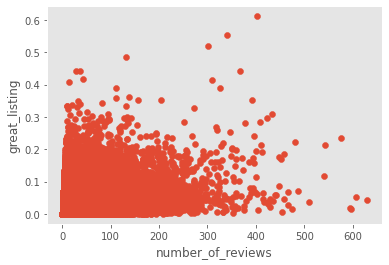

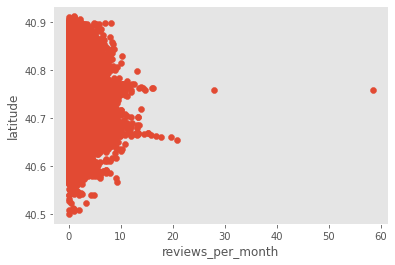

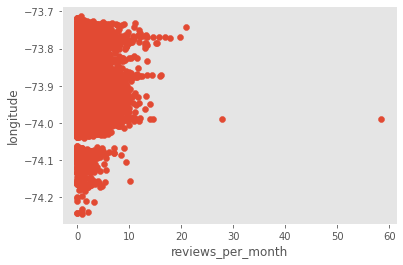

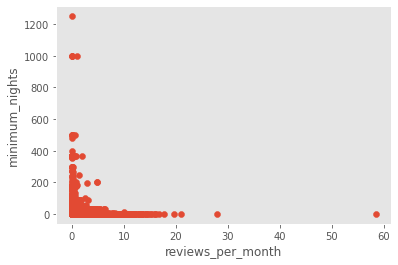

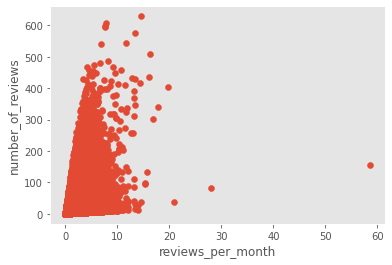

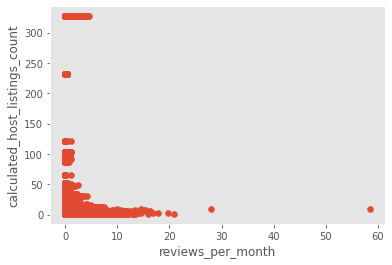

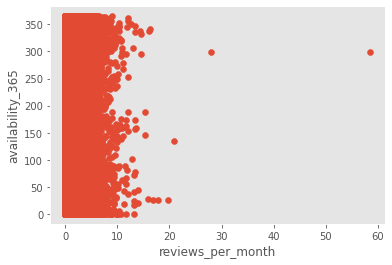

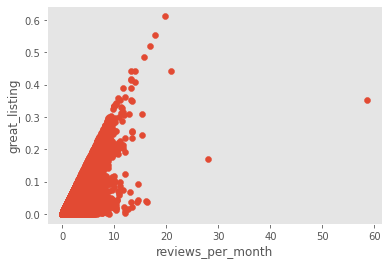

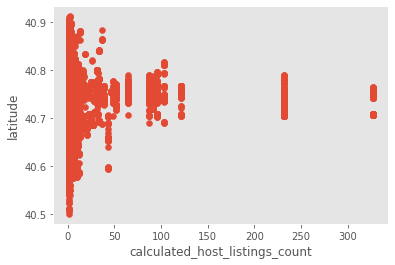

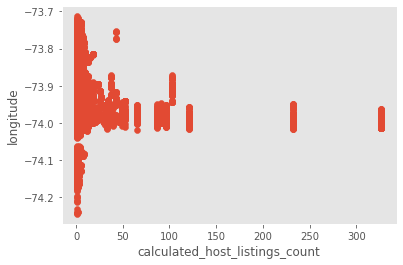

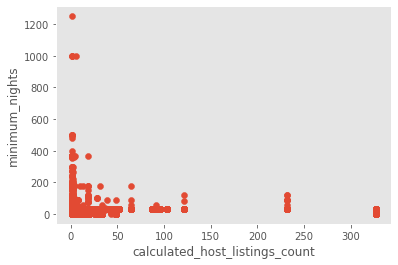

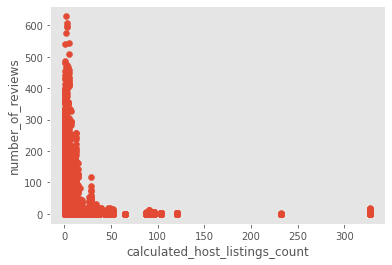

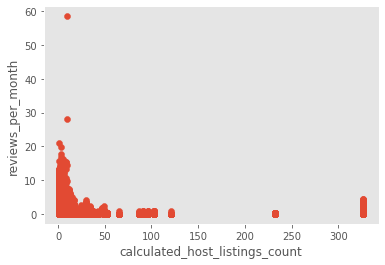

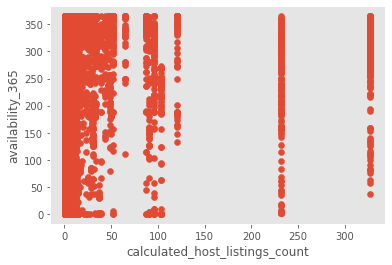

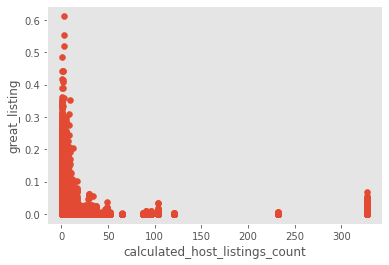

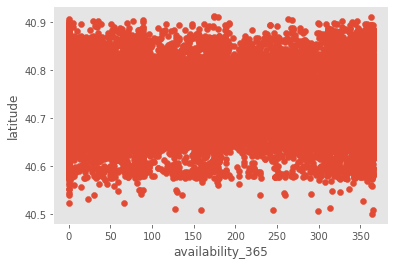

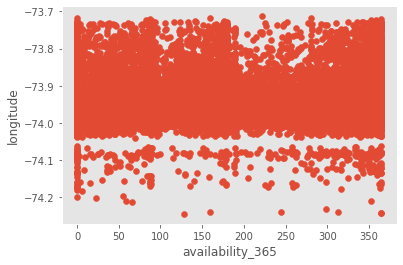

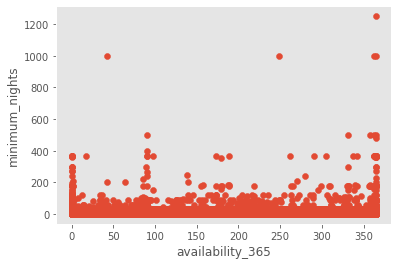

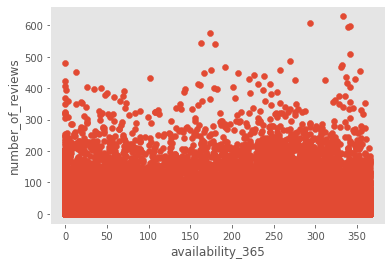

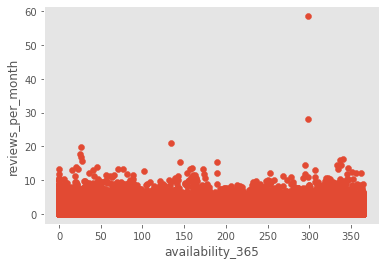

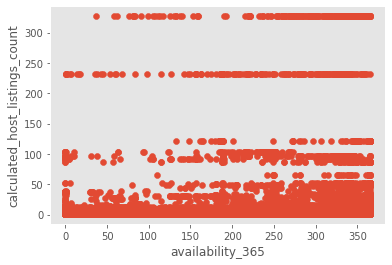

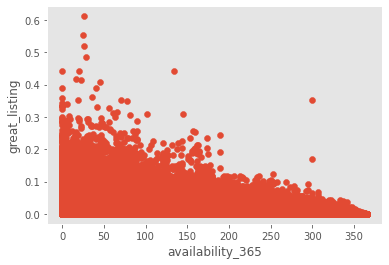

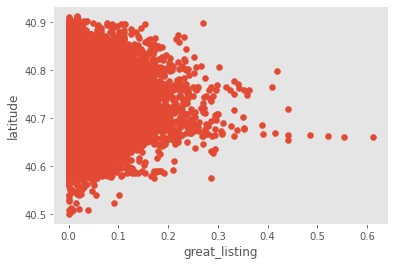

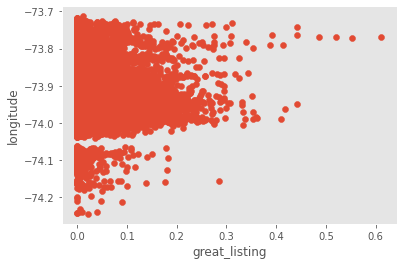

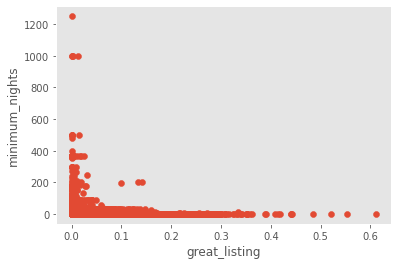

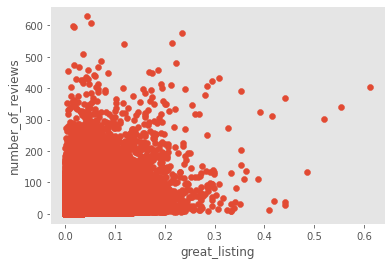

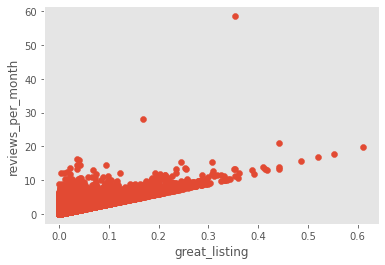

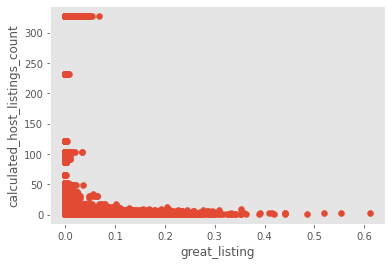

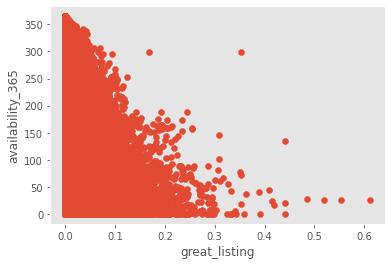

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

for featureset in cross:
  X1 = data[featureset]
  plt.scatter(X1.iloc[:,0], X1.iloc[:,1])
  plt.xlabel(featureset[0]), plt.ylabel(featureset[1])
  plt.grid()
  plt.show()

These are the best candidate-pairs to we believe should be considered for clustering. Intuitively these make sense for various reasons in the final aim of finding hotel priced listings.
1. great_listing, minimum_nights
  * this seems the best combination of features that will help determine higher pricing because of the feature definitions and the likely interaction between both. Also the plot has difinitive areas that could be separated by clusters.
2. availability_365, number of reviews
  * Lots of variation, more than the first candidate; however the data seems less globular. May already be represented in the model by great_listing, which was created from a calculation of both. The idea is that the interaction of these two features may likely create cluster labels that will separate lower priced Airbnbs from higher priced listings.

Reasons to exclude
* longitude,latitude
  * other class features already account for location that may drive price up or down such as class variables like neighborhood and burrow.
* great_listing, (availability_365, reviews)
  * these features are already so similar
* calculated_list_hosting_count
  * Though the data is separated nicely, we're not confident that this feature is as pertinent in the final classification task. List hosting count are the number of other listings a host has and likely has no correlation with price.



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
test = pd.read_csv(r'https://raw.githubusercontent.com/thomaskarba/MachineLearningSMU/master/AB_NYC_2019.csv')

correlation,_= spearmanr(test.calculated_host_listings_count,test.price)
print('Spearman\'s correlation for calculated_host_listings_count and price: %.1f' % correlation)

Spearman's correlation for calculated_host_listings_count and price: -0.1


As suspected calculated_host_listings_count has a Spearman's correlation of -.1, meaning it should not be considered for clustering in the classification task.

The percentage of Hotel_quality listings are 8 %


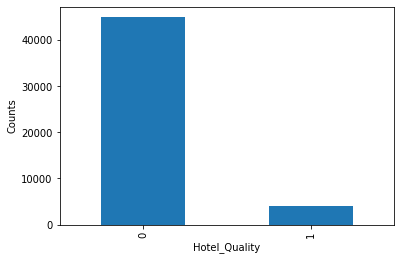

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

hq = data['hotel_quality'].value_counts()

hq.plot(kind='bar')
plt.xlabel('Hotel_Quality')
plt.ylabel('Counts')

print('The percentage of Hotel_quality listings are', '%d' % ((hq[1]/(hq[0]+hq[1]))*100),'%')

We are aiming to classify hotel quality listings aided by clustering targeting 8% of the total listings which equal 1 in the class.

## K-means Validity

Text(0.5, 1.0, 'GreatListing x MinimumNights')

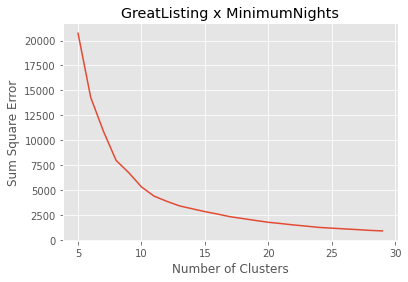

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

data_tocluster = data[['great_listing','minimum_nights']].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_tocluster)
data_tocluster = scaler.transform(data_tocluster)

nC = range(5,30)
SSE = []
for k in nC:
    k_means = KMeans(n_clusters=k,init='k-means++', random_state=1)
    k_means.fit(data_tocluster)
    SSE.append(k_means.inertia_)

plt.plot(nC, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Square Error')
plt.title('GreatListing x MinimumNights')

To determine the optimal number of clusters in select features, using k-means with wide range of clusters from 5 to 30 and recording their respective sum-of-squared errors (SSE) evident by the plot above. The "elbow" in the plot of SSE gives us an estimation for number of clusters for modelling to be approximately 10-15.

Text(0.5, 1.0, 'Availability365 x Number of Reviews')

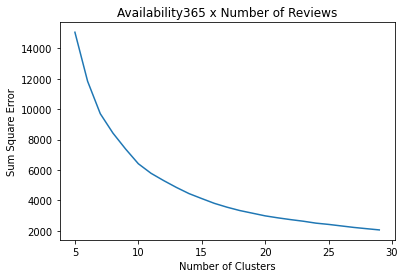

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

data_tocluster2 = data[['availability_365','number_of_reviews']].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_tocluster2)
data_tocluster2 = scaler.transform(data_tocluster2)

nC = range(5,30)
SSE = []
for k in nC:
    k_means = KMeans(n_clusters=k,init='k-means++', random_state=1)
    k_means.fit(data_tocluster2)
    SSE.append(k_means.inertia_)

plt.plot(nC, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Square Error')
plt.title('Availability365 x Number of Reviews')

To determine the optimal number of clusters in our second-best candidate, we used k-means with wide range of clusters from 5 to 30 and recorded their respective sum-of-squared errors (SSE) viewable by the plot above. The "elbow" in the plot of SSE gives us an estimation for number of clusters for modelling to be approximately 12-15.

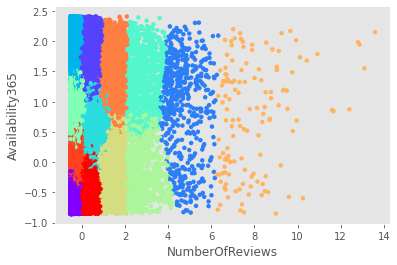

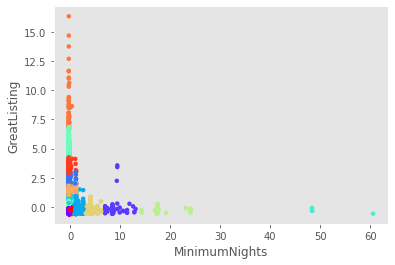

In [ ]:
n1=14
n2=13

d2c1 = data[['great_listing','minimum_nights']]
d2c2=data[['availability_365','number_of_reviews']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d2c1)
X1 = scaler.transform(d2c1)
scaler2 = StandardScaler()
scaler2.fit(d2c2)
X2 = scaler2.transform(d2c2)

cls_fare = KMeans(n_clusters=n1, init='k-means++',random_state=1)
cls_fare.fit(X1)
newfeature_fare = cls_fare.labels_ # the labels from kmeans clustering

# append on the second clustering
cls_fam = KMeans(n_clusters=n2, init='k-means++',random_state=1)
cls_fam.fit(X2)
newfeature_fam = cls_fam.labels_ # the labels from kmeans clustering

plt.figure()


plt.scatter(X2[:, 1], X2[:, 0]+np.random.random(X2[:, 0].shape)/2, c=newfeature_fam, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('NumberOfReviews'), plt.ylabel('Availability365')
plt.grid()

plt.figure()
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=newfeature_fare, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.ylabel('GreatListing'), plt.xlabel('MinimumNights')
plt.grid()

Using lower elbow values for Kmeans on both feature pair candidate which are also scaled, two plots identifying what the clusters actually look like at approximately their best error metrics. It's uncertain however which exact cluster values will perform better at this point.

## DBSCAN Validation

### great_listing x minimum_nights

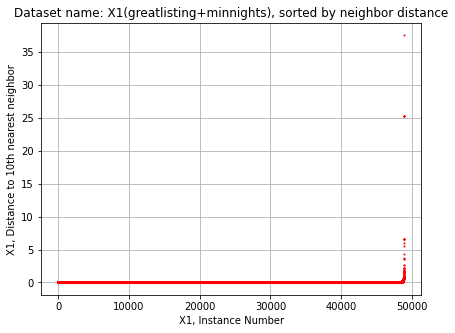

In [ ]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

df = data

d2c1 = data[['great_listing','minimum_nights']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d2c1)
X1 = scaler.transform(d2c1)


#=======================================================
# MINPTS FOR DATASET
X1_N = 10
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X1_knn_graph = kneighbors_graph(X1, X1_N, mode='distance') # calculate distance to four nearest neighbors 

N1 = X1_knn_graph.shape[0]
X1_4nn_distances = np.zeros((N1,1))
for i in range(N1):
    X1_4nn_distances[i] = X1_knn_graph[i,:].max()

X1_4nn_distances = np.sort(X1_4nn_distances, axis=0)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N1), X1_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X1(greatlisting+minnights), sorted by neighbor distance')
plt.xlabel('X1, Instance Number')
plt.ylabel('X1, Distance to {0}th nearest neighbor'.format(X1_N))
plt.grid()

plt.show()

Here we used a Kneighbors calculation to  measure distance of the 10th nearest neighbor of the feature-pair. The plot, though hard to read, tells us we need a distance less than 2.5 for DBSCAN.

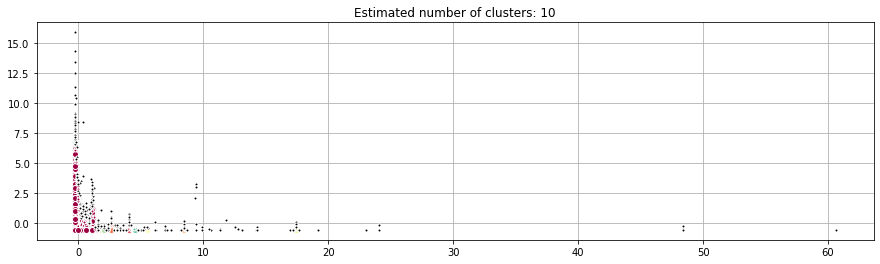

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

#X1 = data[['great_listing','minimum_nights']]

d2c1 = data[['great_listing','minimum_nights']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d2c1)
X1 = scaler.transform(d2c1)

X1_N = 10
#=====================================
X1_minpts = X1_N # from above
X1_eps = .1
#=====================================
#X2 = data[['room_type','calculated_host_listings_count']]

for i, (data, minpts, eps) in enumerate(zip([X1],[X1_minpts],[X1_eps])):

    db = DBSCAN(eps=eps, min_samples=minpts).fit(data)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # mark the samples that are considered "core"
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    plt.figure(figsize=(15,4))
    unique_labels = set(labels) # the unique labels
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        # plot the core points in this class
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=6)

        # plot the remaining points that are edge points
        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
                markeredgecolor='w', markersize=3)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.grid()
    plt.show()

The plot shows the work of the DBSCAN clustering algorithm with the first feature-pair and tells us a value of 10 may be best for the data.

### availability_365 x number_of_reviews

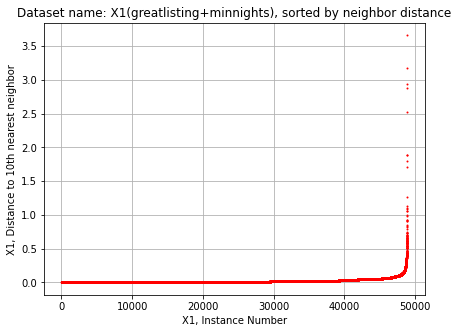

In [ ]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

df = data

d2c1 = data[['availability_365','number_of_reviews']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d2c1)
X1 = scaler.transform(d2c1)


#=======================================================
# MINPTS FOR DATASET
X1_N = 10
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X1_knn_graph = kneighbors_graph(X1, X1_N, mode='distance') # calculate distance to four nearest neighbors 

N1 = X1_knn_graph.shape[0]
X1_4nn_distances = np.zeros((N1,1))
for i in range(N1):
    X1_4nn_distances[i] = X1_knn_graph[i,:].max()

X1_4nn_distances = np.sort(X1_4nn_distances, axis=0)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N1), X1_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X1(greatlisting+minnights), sorted by neighbor distance')
plt.xlabel('X1, Instance Number')
plt.ylabel('X1, Distance to {0}th nearest neighbor'.format(X1_N))
plt.grid()

plt.show()

Here we used a Kneighbors calculation to  measure distance of the 10th nearest neighbor of the second feature-pair. The plot, though hard to read, tells us we need a distance less than .4 for DBSCAN.

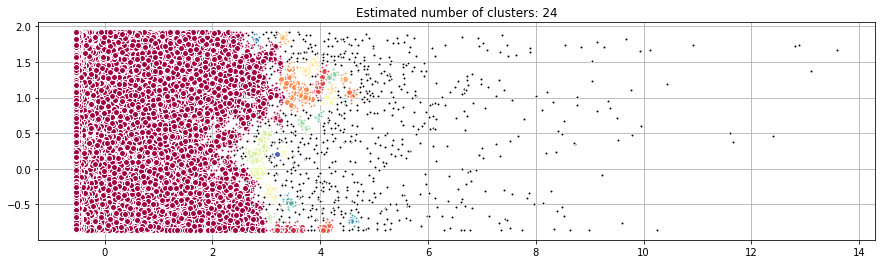

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

#X1 = data[['great_listing','minimum_nights']]

d2c1 = data[['availability_365','number_of_reviews']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d2c1)
X1 = scaler.transform(d2c1)

X1_N = 10
#=====================================
X1_minpts = X1_N # from above
X1_eps = .1
#=====================================
#X2 = data[['room_type','calculated_host_listings_count']]

for i, (data, minpts, eps) in enumerate(zip([X1],[X1_minpts],[X1_eps])):

    db = DBSCAN(eps=eps, min_samples=minpts).fit(data)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # mark the samples that are considered "core"
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    plt.figure(figsize=(15,4))
    unique_labels = set(labels) # the unique labels
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        # plot the core points in this class
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=6)

        # plot the remaining points that are edge points
        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=col,
                markeredgecolor='w', markersize=3)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.grid()
    plt.show()

The plot shows the work of the DBSCAN clustering algorithm with the second feature-pair and tells us a value of 24 may be best for the data. However, the giant blob of data as one cluster (maroon) will mostly likely lead to worse results for the final classification task.

# Modeling and Evaluation 1<br>
<small>*Train and adjust parameters*</small><br><br>

The strategy for this section is:


1.   We will first hypertune a Random Forest Classifier on the data set with none of the features clustered.
2.  Then we will test different clustering models, train and adjust the parameters to find the best model and score it by accuracy, using our Random Forest Classifier and K-fold cross validation.
3.  Finally we will use the best cluster model to create  new features based on the cluster ID's. The cluster ID's will replace the features that were clustered together in the new dataset. 

Our goal here is to employ clustering on feature to feature relationships in order to improve upon our Random Forest Classifier. We feel that by clustering together certain features we can extract feature to feature information that the Random Forest Classifier missed without clustering. We also feel that this could reduce dimensionality within our Random Forest Model which would clear up noise and provide us with better results.



## The original Random Forest Classifier training and adjusting

In [ ]:
# Find Best RF Classifier

from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=0)# Fit the random search model
rf_random.fit(scaled_Xc, y)

rf_random.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  27.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  28.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  28.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.4min
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.7min
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 262.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Here we hypertune a Random Forest Classifier before we cluster our features. This finds us the optimal Random Forest Classifier based on accuracy and gives us a benchmark for clustering. We will then use this classifier to score our accuracy while tuning different feature clustering.

In [ ]:
#Hard code best RF model so hypertuning does not need to be re-run
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 


This is simply the hard coded Random Forest Classifier from above so we do not need to re-run the hypertuning everytime we would like to store the object.

## Clustering: great_listing x minimum_nights

In [ ]:

from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# here we are duplicating our data set because will be dropping some columns to create new features
df = data

#'great_listing','minimum_nights'
#'availability_365','number_of_reviews'

# we are creating a dataframe on the features will be clustering on
X1 = df[['great_listing','minimum_nights']]

# Since we are using room_type and reviews_per_month to create a new feature will drop them from our dataframe
df.drop(['great_listing','minimum_nights'], axis = 1)

cv = StratifiedKFold(n_splits=3,shuffle=True, random_state=0)


# the code below is generating clusters on differents K's and applying the new feature to the random forest classifier to check if it improves the Classifier's score
for n_fare in range(10,16):

  
  cls = KMeans(n_clusters=n_fare,init='k-means++', random_state=1)
  cls.fit(X1)
  newfeatures = cls.labels_


  X2 = df
  X2 = np.column_stack((X2,pd.get_dummies(newfeatures)))


  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X2)
  scaled_Xc = scaler.transform(X2)


  acc = cross_val_score(clf,X2,y=y,cv=cv)

  print ("Cluster", n_fare ,"Average accuracy= ", acc.mean()*100, "+-", acc.std()*100)

Cluster 10 Average accuracy=  92.60660699010853 +- 0.039892095724498186
Cluster 11 Average accuracy=  92.5575215891603 +- 0.030381858391942438
Cluster 12 Average accuracy=  92.56774779278446 +- 0.036121647756683445
Cluster 13 Average accuracy=  92.56979278254413 +- 0.01790846223915994
Cluster 14 Average accuracy=  92.55752045981698 +- 0.03024446345738284
Cluster 15 Average accuracy=  92.56570154819892 +- 0.045533210174789854


Using the number of cluster from ideal area from the elbow plot of SSE we test a range of clusters from 10-15 for great_listing and minimum_nights to see what performances are of the Random Forest classifier. 10 Clusters was the best performing.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import StratifiedKFold, cross_val_score

# here we are duplicating our data set because will be dropping some columns to create new features
data = df

# we are creating a dataframe on the features will be clustering on
X1 = df[['great_listing','minimum_nights']]

# Since we are using room_type and reviews_per_month to create a new feature will drop them from our dataframe
df.drop(['great_listing','minimum_nights'], axis = 1)

cv = StratifiedKFold(n_splits=3,shuffle=True, random_state=0)

for eps in [0.1,0.125]:
  for mpts in range(10,51,5):

    cls_fam = DBSCAN(eps=eps, min_samples=mpts)
    cls_fam.fit(X1)
    newfeatures_fam = cls_fam.labels_

    X2 = df
    X2 = np.column_stack((X2,pd.get_dummies(newfeatures_fam)))

    acc = cross_val_score(clf,X2,y=y,cv=cv)
    
    print (eps, mpts,"Average accuracy= ", acc.mean()*100, "+-", acc.std()*100)

0.1 10 Average accuracy=  92.53911479908456 +- 0.034988860849462566
0.1 15 Average accuracy=  92.5595660769896 +- 0.01909852155849202
0.1 20 Average accuracy=  92.55547572102252 +- 0.02480154629080573
0.1 25 Average accuracy=  92.54525102318944 +- 0.04262791808003757
0.1 30 Average accuracy=  92.57388338947638 +- 0.03612174616598726
0.1 35 Average accuracy=  92.54525089770684 +- 0.04438042009676678
0.1 40 Average accuracy=  92.56774691440634 +- 0.01623996772547944
0.1 45 Average accuracy=  92.58615483382539 +- 0.0453208609393561
0.1 50 Average accuracy=  92.54729638939686 +- 0.040586866517550044
0.125 10 Average accuracy=  92.54116041625716 +- 0.03241317691321015
0.125 15 Average accuracy=  92.54729601294906 +- 0.032413326164907705
0.125 20 Average accuracy=  92.56161194512738 +- 0.02303220784339031
0.125 25 Average accuracy=  92.54934087722614 +- 0.04538255711765478
0.125 30 Average accuracy=  92.56161232157515 +- 0.03678423294007641
0.125 35 Average accuracy=  92.5697931589919 +- 0.0

Using the same features of great_listing and minimum_nights we try a different clustering algorithm from Kmeans. Instead we use DBSCAN with a range of eps and min points. The best eps value was .1 with min points of 10.

## Clustering: availability_365 x number_of_reviews

In [ ]:
from sklearn.cluster import KMeans

# here we are duplicating our dataset because will be dropping some columns to create new features
data = df

# we are creating a dataframe on the features will be clustering on
X1 = df[['availability_365','number_of_reviews']]

# Since we are using room_type and reviews_per_month to create a new feature will drop them from our dataframe
df.drop(['availability_365','number_of_reviews'], axis = 1)

# the code below is generating clusters on differents K's and applying the new feature to the random forest classifier to check if it improves the score

for n_fare in range(12,16):

  
  cls = KMeans(n_clusters=n_fare,init='k-means++', random_state=1)
  cls.fit(X1)
  newfeatures = cls.labels_


  X2 = df
  X2 = np.column_stack((X2,pd.get_dummies(newfeatures)))


  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X2)
  scaled_Xc = scaler.transform(X2)


  acc = cross_val_score(clf,X2,y=y,cv=cv)

  print ("Cluster", n_fare ,"Average accuracy= ", acc.mean()*100, "+-", acc.std()*100)

Cluster 12 Average accuracy=  92.50434758900124 +- 0.053817777179908495
Cluster 13 Average accuracy=  92.52071001673026 +- 0.09258758910156568
Cluster 14 Average accuracy=  92.5247996198018 +- 0.06784132925719048
Cluster 15 Average accuracy=  92.51661915883284 +- 0.07280139157641993


Using the number of cluster ideal from the elbow plot of SSE we test a range of clusters from 6-12 for availability_365 and number_of_reviews to see what performances are of the Random Forest classifier. Although the general accuracy is high there is quite a bit more wiggle room in standard deviation, which tells us kmeans may be less reliable than the DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# here we are duplicating our data set because will be dropping some columns to create new features
df = data

#availability_365
#number_of_reviews

# we are creating a dataframe on the features will be clustering on
X1 = df[['availability_365','number_of_reviews']]

df.drop(['availability_365','number_of_reviews'], axis = 1)

cv = StratifiedKFold(n_splits=3,shuffle=True, random_state=0)

for eps in [0.1,0.125]:
  for mpts in range(5,31,5):

    cls_fam = DBSCAN(eps=eps, min_samples=mpts)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
    cls_fam.fit(X1)
    newfeatures_fam = cls_fam.labels_

    X2 = df
    X2 = np.column_stack((X2,pd.get_dummies(newfeatures_fam)))

    acc = cross_val_score(clf,X2,y=y,cv=cv)
    
    print (eps, mpts,"Average accuracy= ", acc.mean()*100, "+-", acc.std()*100)

0.1 5 Average accuracy=  92.25074213101254 +- 0.02628824626886398
0.1 10 Average accuracy=  92.43276491652762 +- 0.02913792984589202
0.1 15 Average accuracy=  92.4777583302351 +- 0.005199195563624647
0.1 20 Average accuracy=  92.475714093371 +- 0.028705264545089964
0.1 25 Average accuracy=  92.504345832245 +- 0.033404467748665505
0.1 30 Average accuracy=  92.502302473759 +- 0.0562385902266445
0.125 5 Average accuracy=  92.29778178930559 +- 0.03239721139183729
0.125 10 Average accuracy=  92.44299049273884 +- 0.014242873769844256
0.125 15 Average accuracy=  92.50025685658639 +- 0.04742257264536308
0.125 20 Average accuracy=  92.51661752755918 +- 0.015968813032124676
0.125 25 Average accuracy=  92.50843719207279 +- 0.043544958430240886
0.125 30 Average accuracy=  92.50639170038278 +- 0.02352985427256326


Testing the DBSCAN on the second pair to cluster on, availability_365 and number_of_reviews, yields a worse result but noneetheless has its greatest accuracy with an eps of .125 and a min points of 20. 

## Second Random Forest Classifier with Clusters training and adjusting

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# here we are duplicating our data set because will be dropping some columns to create new features
#df = data
# we are creating a dataframe on the features will be clustering on
#X1 = df[['availability_365','number_of_reviews']]
#df.drop(['availability_365','number_of_reviews'], axis = 1)

#cls_fam = DBSCAN(eps=.125, min_samples=20)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
#cls_fam.fit(X1)
#newfeatures_fam = cls_fam.labels_
#cluster_df = np.column_stack((X1,pd.get_dummies(newfeatures_fam)))

df = data

# we are creating a dataframe on the features will be clustering on
X2 = df[['great_listing','minimum_nights']]

# Since we are using room_type and reviews_per_month to create a new feature will drop them from our dataframe
df.drop(['great_listing','minimum_nights'], axis = 1)

cls = KMeans(n_clusters=10,init='k-means++', random_state=1)
cls.fit(X2)
newfeatures = cls.labels_

cluster_df = np.column_stack((df,pd.get_dummies(newfeatures)))

scaler = StandardScaler()
scaler.fit(cluster_df)
scaled_cluster = scaler.transform(cluster_df)



After tuning our features with different clustering techniques and parameters we arrived at an optimal set of clusters for high accuracy. Above is the final dataset result of the transformed features from clustering using our best performing clustering algorithms.

This new dataset differs from the old in that it now has cluster label IDs  instead of 'availability_365','number_of_reviews','great_listing', and 'minimum_nights'. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_cluster = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=0)# Fit the random search model
rf_cluster.fit(scaled_cluster, y)

rf_cluster.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=  44.0s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=  45.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=  45.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, total=  49.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, total=  53.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, total=  49.5s
[CV] n_estimators=400, min_samples

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 193.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_cluster.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

For reference.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cluster_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

This will be the model we will use on the data with clustered labels.

# Modeling and Evaluation 2
<small>*Evaluate and Compare*</small>

In [ ]:
scaled_Xc.shape

(48895, 234)

In [ ]:
scaled_cluster.shape

(48895, 244)

Sanity check.

In [ ]:
y.shape

(48895,)

In [ ]:
yc=y.copy()

In [ ]:
#Compare best accuracy RF model to best recall RF model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0) #make sure to keep same random_state across models

def EvaluateClassifierEstimator(classifierEstimator1, classifierEstimator2, X, X_clustered, y1,y2, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator1, X, y1, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)
    scores2 = cross_validate(classifierEstimator2, X_clustered, y2, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    Accavg2 = scores2['test_accuracy'].mean()
    Preavg2 = scores2['test_precision'].mean()
    Recavg2 = scores2['test_recall'].mean()

    print("The average Non-Clustered RF model accuracy for all cv folds is:", Accavg)
    print("The average Non-Clustered RF model precision for all cv folds is:", Preavg)
    print("The average Non-Clustered RF model recall for all cv folds is:", Recavg)

    print("The average Clustered RF model accuracy for all cv folds is:", Accavg2)
    print("The average Clustered RF model precision for all cv folds is:", Preavg2)
    print("The average Clustered RF model recall for all cv folds is:", Recavg2)
    
    
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Non-Clustered RF Model Accuracy'] = scores['test_accuracy']
    scoresResults['Clustered RF Model Accuracy'] = scores2['test_accuracy']
    scoresResults['Non-Clustered RF Model Precision'] = scores['test_precision']
    scoresResults['Clustered RF Model Precision'] = scores2['test_precision']
    scoresResults['Non-Clustered RF Model Recall'] = scores['test_recall']
    scoresResults['Clustered RF Model Recall'] = scores2['test_recall']
    return scoresResults
classifierEst1 = clf
classifierEst2 = cluster_rf


#Evaluate the estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst1,classifierEst2, scaled_Xc, scaled_cluster, y,yc, cv)

The average Non-Clustered RF model accuracy for all cv folds is: 0.9268432326482262
The average Non-Clustered RF model precision for all cv folds is: 0.70247727999786
The average Non-Clustered RF model recall for all cv folds is: 0.15185682968839712
The average Clustered RF model accuracy for all cv folds is: 0.9244912685336347
The average Clustered RF model precision for all cv folds is: 0.7685625825356946
The average Clustered RF model recall for all cv folds is: 0.08294665692363902
*********************************************************
Cross Validation Fold Mean Error Scores


,Non-Clustered RF Model Accuracy,Clustered RF Model Accuracy,Non-Clustered RF Model Precision,Clustered RF Model Precision,Non-Clustered RF Model Recall,Clustered RF Model Recall
0,0.925767,0.925153,0.646465,0.732143,0.163265,0.104592
1,0.926380,0.924949,0.695122,0.820513,0.145408,0.081633
2,0.926789,0.923313,0.688889,0.707317,0.158163,0.073980
3,0.926585,0.924131,0.732394,0.818182,0.132653,0.068878
4,0.928834,0.924335,0.734043,0.739130,0.176020,0.086735
5,0.927388,0.924115,0.743243,0.763158,0.140665,0.074169
6,0.924524,0.923911,0.627907,0.731707,0.138107,0.076726
7,0.928206,0.926161,0.746988,0.878049,0.158163,0.091837
8,0.925956,0.922888,0.687500,0.682927,0.140306,0.071429
9,0.928002,0.925956,0.722222,0.812500,0.165816,0.099490


To give us full context of the original performance vs the model with added clusters we perform 10-fold stratified cross validation on the best Random Forest classifier for each dataset. 

Assessing the results with and without the cluster on (great_listing,minimum_nights) we find that that the classification benefitted the most from the original data or the clustering did not add value to the task in 2 of 3 metrics used for evaluation. However, we did see quite a bump in results in terms of precision (clusteravg = .769)  with only a slight loss to overall accuracy(.9268 to .9245). This bump in precision may be negated by the loss in recall score(.152 to .083)

## Evaluation Details
The non-clustered model perform with an average accuracy +.3% higher than clustered model. Precision however was another story. The clustered model performed +6.5% higher than the non-clustered model. For recall, both models failed the capture the majority of false negatives, with the non-clustered approach approximately +7% higher than the clustered approach. Using the best of three approach, the non-clustered data should be considered the winner.

One thing that has been hard to achieve is both high precision and high recall in any of our classifiers. The dataset is disproportionate in that most of the hotel_listing values are 0. Our classifiers have a tendency to over predict hotel_listing as 0 because of this. It would also appear that not enough variables are correlated with hotel_listing value of 1. If more of our features had a stronger connection to being classified as 1 than our classifiers would have a chance to capture this association and use it to classify with better precision and recall. Essentially, because of these two things it appears that our classifiers tend to be too heavily influenced into simply classifying something as hotel_listing=0, most of the time.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_Xc, y, test_size=.75,
                                                    random_state=0)#Split data manually since there is no cv performed

clf.fit(x_train, y_train)
non_clust = clf.predict(x_test)

x_train, x_test, y_train, y_test = train_test_split(scaled_cluster, y, test_size=.75,
                                                    random_state=0)#Split data manually since there is no cv performed

cluster_rf.fit(x_train, y_train)
clust = cluster_rf.predict(x_test)

import numpy as np
from mlxtend.evaluate import ftest

f, p_value = ftest(y_test, 
                   non_clust, 
                   clust)

print('F: %.3f' % f)
print('p-value: %.3f' % p_value)


F: 3.000
p-value: 0.083


/usr/local/lib/python3.6/dist-packages/mlxtend/evaluate/f_test.py:80: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mod in y_model_predictions)).astype(int)


The accuracies of our two classifying models are extremely close so an F-test was ran on the overall accuracies. This resulted in an F value of 3 with a p-value of .083. This means that at a confidence level of 95% we cannot conclude that there is a difference between the overall accuracies. 

Even if we cannot statistically prove that the two accuracies are significantly different, we would still deploy our RF model with the original data due to the fact the the overall Recall score is much higher and there is a bump in accuracy, albiet not a significant one.

# Modeling and Evaluation 3<br>
<small>*Visualize Results*</small>

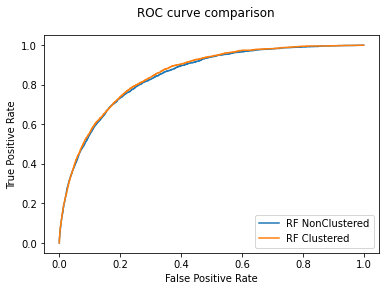

In [ ]:
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_Xc, y, test_size=.8,
                                                    random_state=3)#Split data manually since there is no cv performed

clf.fit(x_train, y_train)


xc_train, xc_test, yc_train, yc_test = train_test_split(scaled_cluster, y, test_size=.8,
                                                    random_state=3)#Split data manually since there is no cv performed

cluster_rf.fit(xc_train, yc_train)


clf_display = metrics.plot_roc_curve(clf, x_test, y_test)
clust_disp = metrics.plot_roc_curve(cluster_rf, xc_test, yc_test, ax=clf_display.ax_)
clust_disp.figure_.suptitle("ROC curve comparison")

plt.legend(['RF NonClustered','RF Clustered'])
plt.show()

The ROC curves are almost identical for each classifier. The ROC curves show us the trade-off between sensitivity (recall) and specificity. The trade-off for each of our two classifiers are the same. The AUC is therefore the same for both, since they are the same curve they have the same area beneath the curve. Based on this figure we cannot conclude that one classifier does any better than the other. 

In [ ]:
!pip install --upgrade yellowbrick

     |████████████████████████████████| 266kB 2.8MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


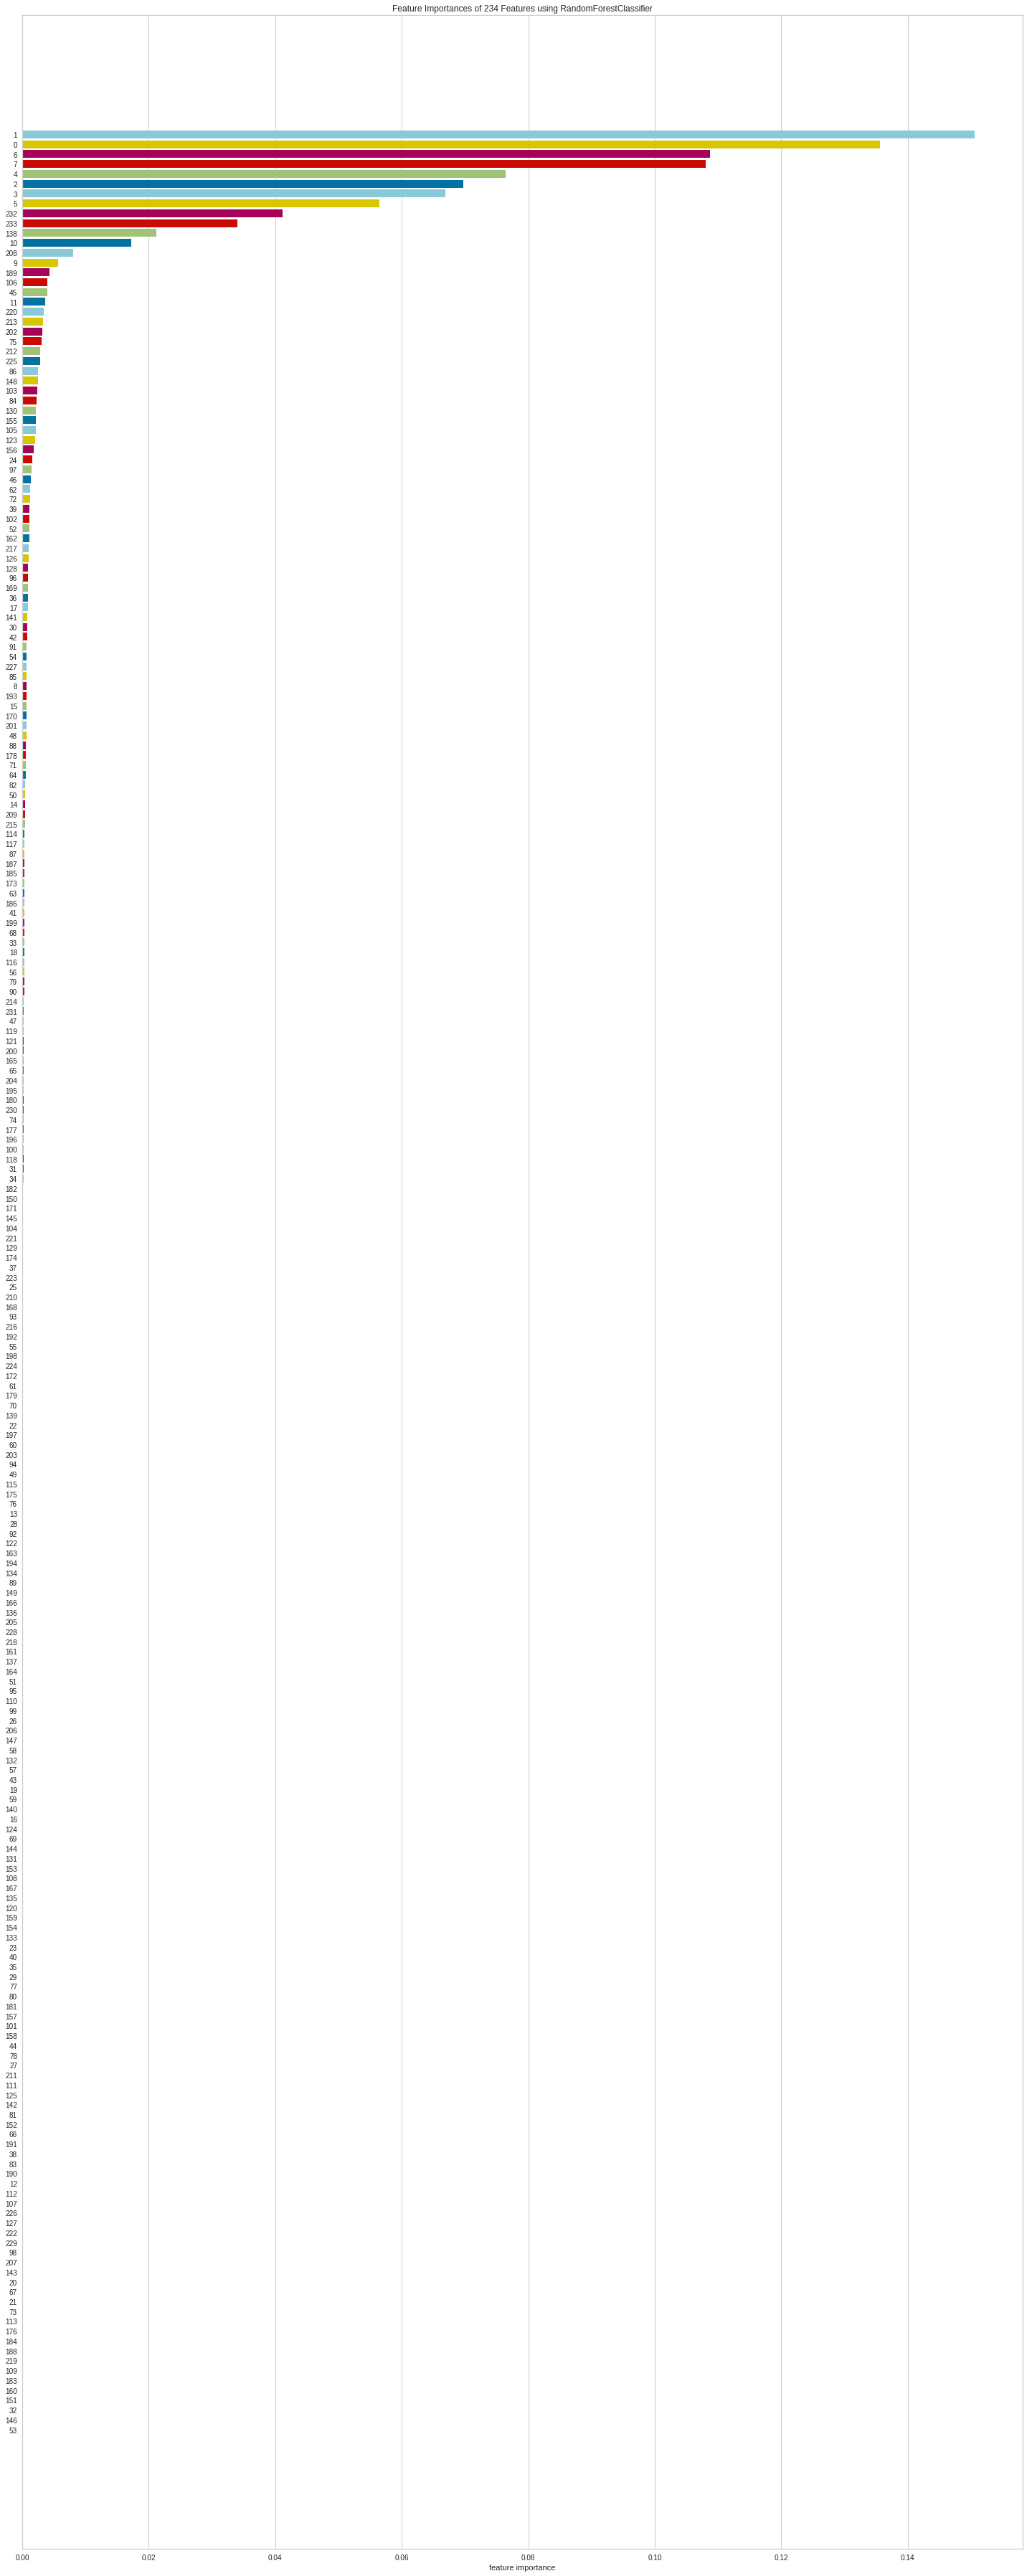

In [ ]:

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances


# below is the already tuned Random Forest Classifier
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

# Below code determines the plot size
fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)

## Create the visualizer,fit and shows it
viz = FeatureImportances(clf, relative=False,ax=ax)
viz.fit(scaled_Xc, y)
viz.show()


In [ ]:
col_list = data.columns
count = 1
for col in col_list[[1,0,6,7,4,2,3,5,232,233]]:
  print('The #',count,'feature is ',col)
  count += 1


The # 1 feature is  longitude
The # 2 feature is  latitude
The # 3 feature is  availability_365
The # 4 feature is  great_listing
The # 5 feature is  reviews_per_month
The # 6 feature is  minimum_nights
The # 7 feature is  number_of_reviews
The # 8 feature is  calculated_host_listings_count
The # 9 feature is  type_Entire home/apt
The # 10 feature is  type_Private room


The above feature importance is using our RF classifier on our unclustured data. Longitude and latitude are our two most important features based on this classifier. This makes sense since longitude and latitude represent points on the map and some points in NYC are more desirable due to location to tourists attractions. Availability_365 is also important as places that are available may be more associated with price. Great_listing is also heavily correlated with high/low price. Places that have better great listing scores are more valuable and may be priced higher. Surprisingly, Entire home/apt is only 9. This is a bit shocking considering many High priced listings are full houses.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


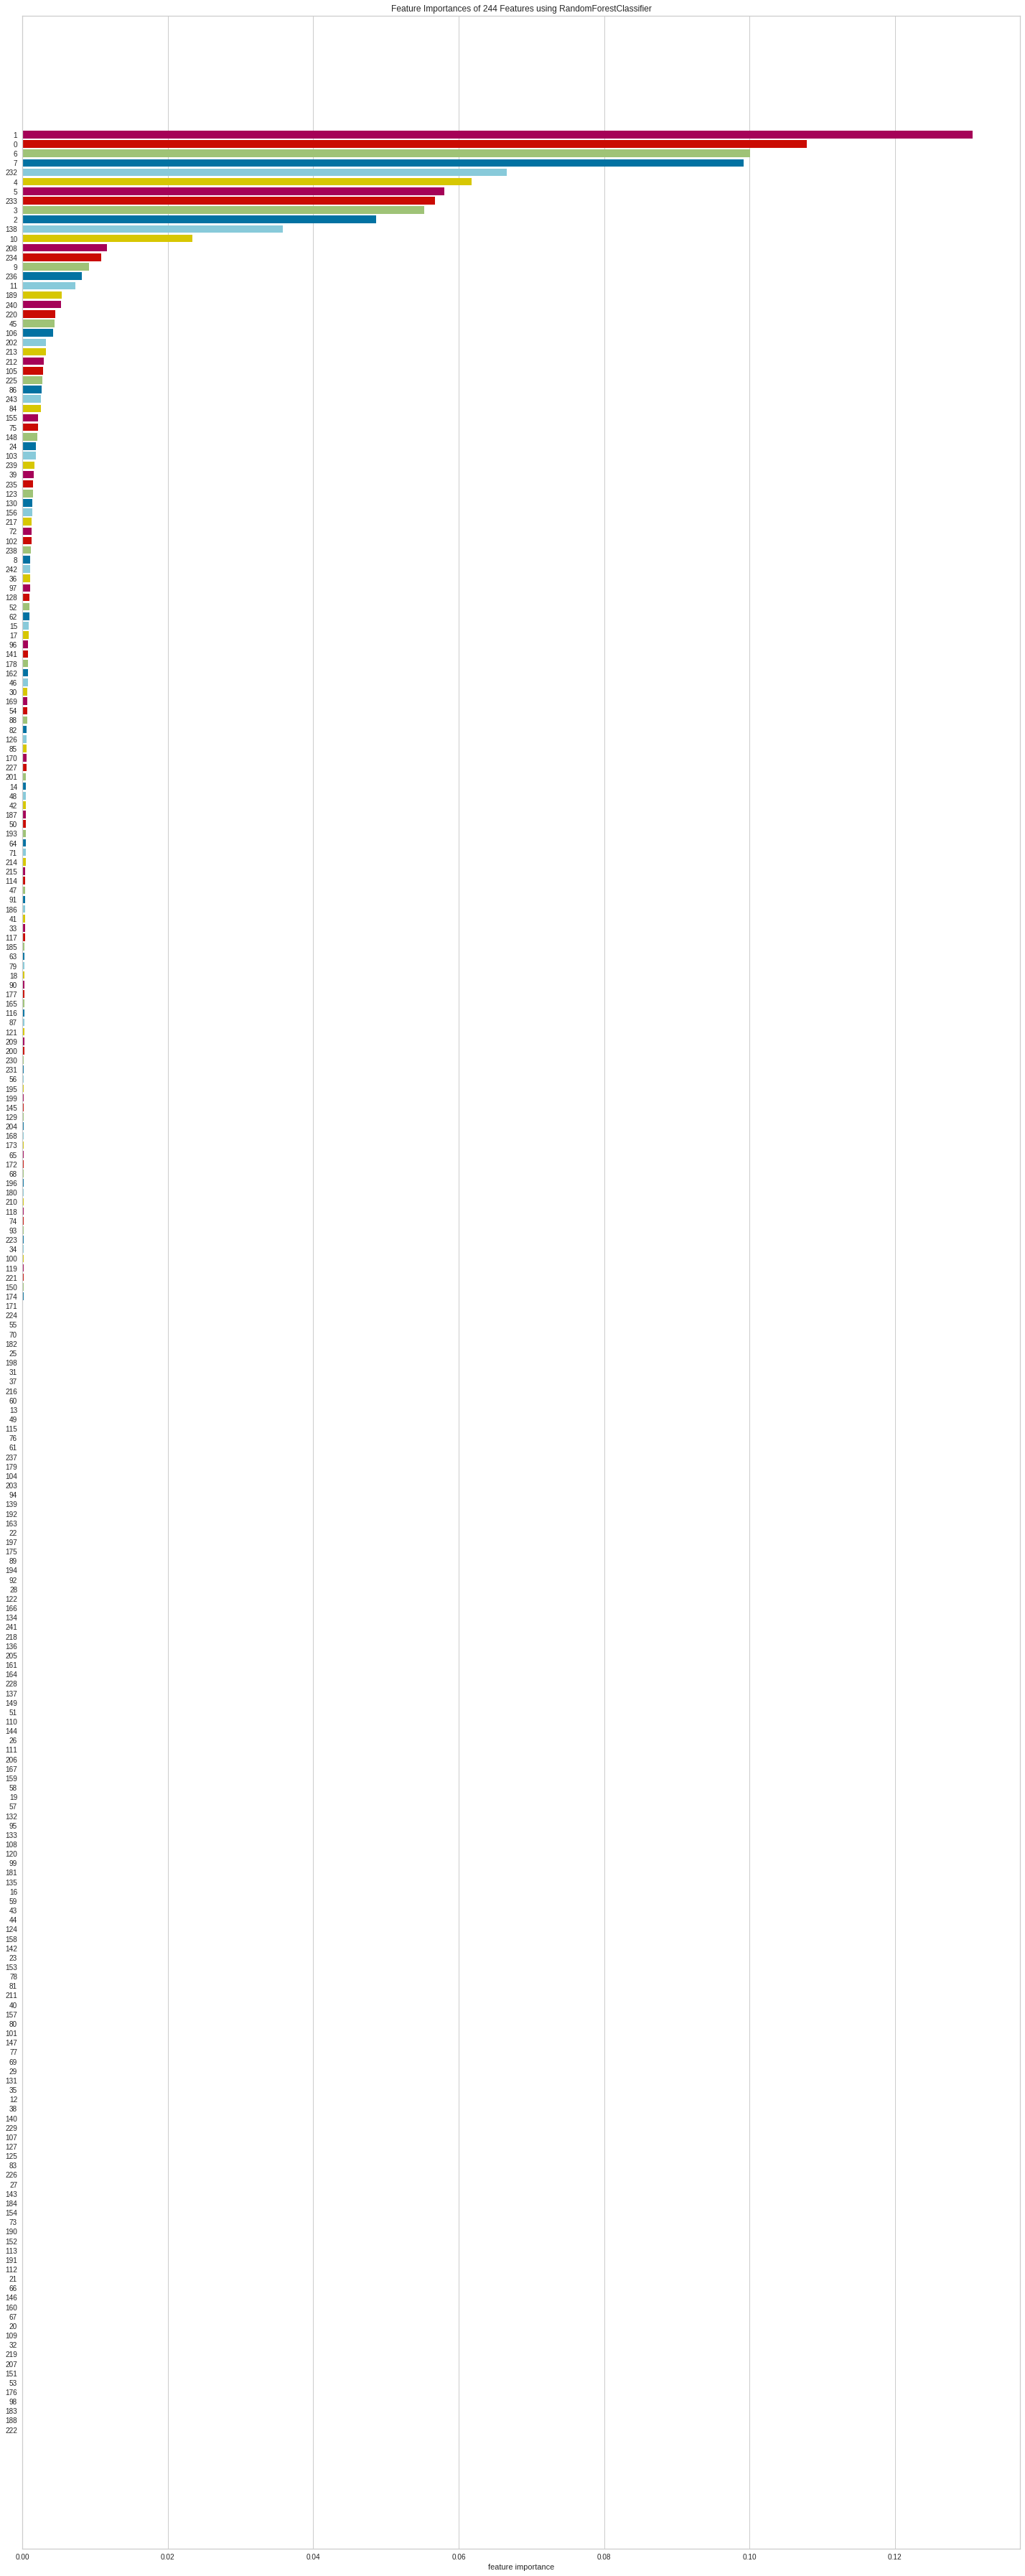

In [ ]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances


# below is the already tuned Random Forest Classifier
cluster_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Below code determines the plot size
fig2 = plt.figure(figsize=(20,50))
ax2 = fig2.add_subplot(111)

## Create the visualizer,fit and shows it
viz2 = FeatureImportances(cluster_rf, relative=False,ax=ax2)
viz2.fit(scaled_cluster, y)
viz2.show()

In [ ]:
col_list = data.columns
count = 1
for col in col_list[[1,0,6,7,232,4,5,233,3,2]]:
  print('The #',count,'feature is ',col)
  count += 1


The # 1 feature is  longitude
The # 2 feature is  latitude
The # 3 feature is  availability_365
The # 4 feature is  great_listing
The # 5 feature is  type_Entire home/apt
The # 6 feature is  reviews_per_month
The # 7 feature is  calculated_host_listings_count
The # 8 feature is  type_Private room
The # 9 feature is  number_of_reviews
The # 10 feature is  minimum_nights


The feature importance in our clustered RF shows a similar top ten to our unclustered. It has the same exact top 4 in the same order. Unfortunately our new features created by the cluster IDs did not appear at all in the top ten. This is not necessarily a failure as our goal was not necessarily to make important features but to improve our classifier overall.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


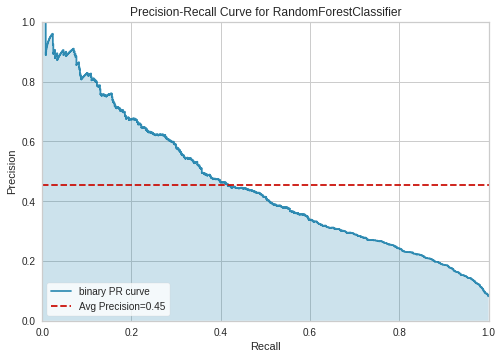

In [ ]:
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
                      max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

X_train, X_test, y_train, y_test = tts(scaled_Xc, y, test_size=0.25, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(clf)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

This is the general performance of the model without the clusters for reference. It shows that the area under the line which is precision by recall is our capture successes really shows our classifier may not be acceptable. Perhaps the data is the problem, is an idea we explore in Deployment.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


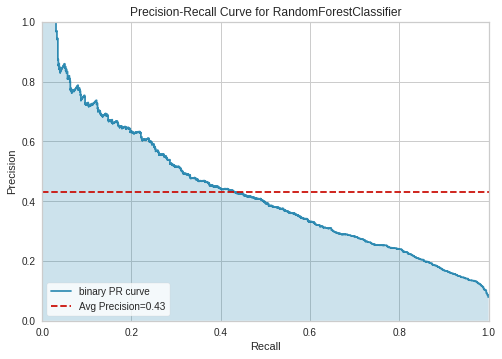

In [ ]:
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.ensemble import RandomForestClassifier

cluster_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

X_train, X_test, y_train, y_test = tts(scaled_cluster, y, test_size=0.25, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(cluster_rf)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Area under the curve for the clustered data and special classifier set to clustered data, similiar poor performance, only a few hundredths difference in average precision. This is expected to have a similar performance, there are problems with the task of classifying which we will write about in Deployment.

# Modeling and Evaluation 4<br>
<small>*Summarize the Ramifications*</small><br>
Our overall approach was to perform clustering on feature to feature relationships in order to use these new cluster IDs as features. Our logic was that by clustering together different features we could extract more information from their feature to feature association. In our initial EDA we plotted scatterplots of all the different combinations of our features against each other. This gave us insight into which feature x feature relationship were producing clusters. From the plots we chose to move forward with great_listing x minimum_nights and availability_365 x number_of_reviews. Great_listing x minimum_nights have an obvious cluster where there are many points with low minimum_nights and a wide range of great_listing values. In the scatterplot there also appeared to be other pockets of potential clusters. We also moved foward with availability_365 x number_of_reviews because it appeared that there were potential clusters. There seemed to be at least one big cluster and some other pockets of values that we had hoped could make these features more optimal for our classifier.

Based on the scatterplots we chose to use K-means clustering and DBscan. We used K-means because there were not many outliers to influence the center of the clusters. There were no dimensionality issues either since there were only two features. We also used DBScan because there did appear to be noise in our scatterplots which DBScan ignores. We used SSE in our k-means to give us an idea of the number of clusters that yield the lowest error. We used a plot of the distance to the 10th neighbor to give us an idea of the range for eps. and min points. 

We then used these to test around a range of parameters.In order to set the exact parameters for DBScan and KNN we performed 10 fold stratified cross validation using our RF model and scored the accuracy for each parameter combinaton. Finally, we moved forward with great_listing x minimum_nights using K-means with a K=10. This was chosen as it gave our RF classifier the best accuracy.

The biggest disadvantage to our approach was that in our attempt to optimize our RF model we were greedy at each step. What that means is that instead of potentially going with more intuitive clustering, we chose our clusters based solely on how they helped our classifier perform. The trade-off was that instead of possibly having a smaller number of clusters that make more sense visually and logically we chose the clustering that lead to the highest RF accuracy which often lead to more clusters being created than most would guess would need to be created.
 

# Deployment<br>
<small>*Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?*</small>

An issue with the problem of our classification model, evident by poor recall and large number of false negatives, which is out of our (as well as Airbnb's) control is that there is no due diligence in pricing of listings. The general trend which can be counted on and modeled, but not enforced, is that hosts will price a property according to the intrinsic/extrinsic value and demand of their property which the data captures to a certain extend. Location and demand for a listing will generally lead to a host pricing a listing at what may be deemed hotel quality or price of average cost of hotel in New York City which is $300, but there are other factors missing in the determination of price which are not accounted for, limiting performance of the model. We are trying to take a rigid mathematical approach to something that is organic and driven in part by speculative interest or even greed. 

Some hosts may be in greater need of money and seek to lower their prices as to increase demand for their listing despite intrinsic/extrinsic values of the listing; this would throw the model. Other hosts simply enjoy having guests and want as many as possible so will lower their prices. On the contrary hosts cannot be bothered with lots of guests and will price higher despite lower intrinsic/extrinsic value of the listing. Some hosts will partake in a practice known by research where they are purely driven by speculative interests and rent housing for the sole purpose of listing on Airbnb and are perhaps the best listings for the model because these hosts are driven to make Airbnb a business with the same business model as a hotel would. These entrepreneurs are more business-minded about pricing to which the model will easily adjust. Other nuances which may not be represented in this public Airbnb dataset are amenities or scores for modernity, furniture, or square footage which is likely data Airbnb has that isn't public or needs to collect if they wanted to become more analytically competitive compared to the hotel industry. The issue of false negatives likely speak to this derth in the data. 

More granular data would help us tremendously in future research. Our biggest issue is finding features that have a strong association with being classified as "High" price. If instead of having simply reviews per month we had positive/negative scores for them or even the written review which we could text mine. Another good feature would be square footage instead of just simply the room_type. Features that showed amenities such as cable packages, furniture, pool access, etc. would all help us be able to better find values associated with an Airbnb listing being higher than a hotel.

Because there are not many other businesses like Airbnb this model would not be useful to other parties. The model is exclusive to Airbnb due to features like minimum_nights and reviews. 

A positive interpretation of the models' performance or lack thereof in terms of recall is that Airbnb would still be able to program an alert or automated email to a host to remind them they are pricing in a range of a New York City hotel and thus should be critical if their listing meets the standard. This could even be enforced with input from a host as justification for a price. In turn, this kind of effort after deployment would be a positive feedback loop for the model and create a ripe opportunity for retraining and reclassifying listings with greater success. How often the model would need to be retrained really depends on data internal to Airbnb. We have a static instance of New York City data. The reality is this data changes, so the periods when X% of data has changed is probably the best interval for retraining the model. By our best guess this would be once a month.





# Expectional Work
### Association Rules Mining

Text(0.5, 1.0, 'Support count for some 3-itemsets')

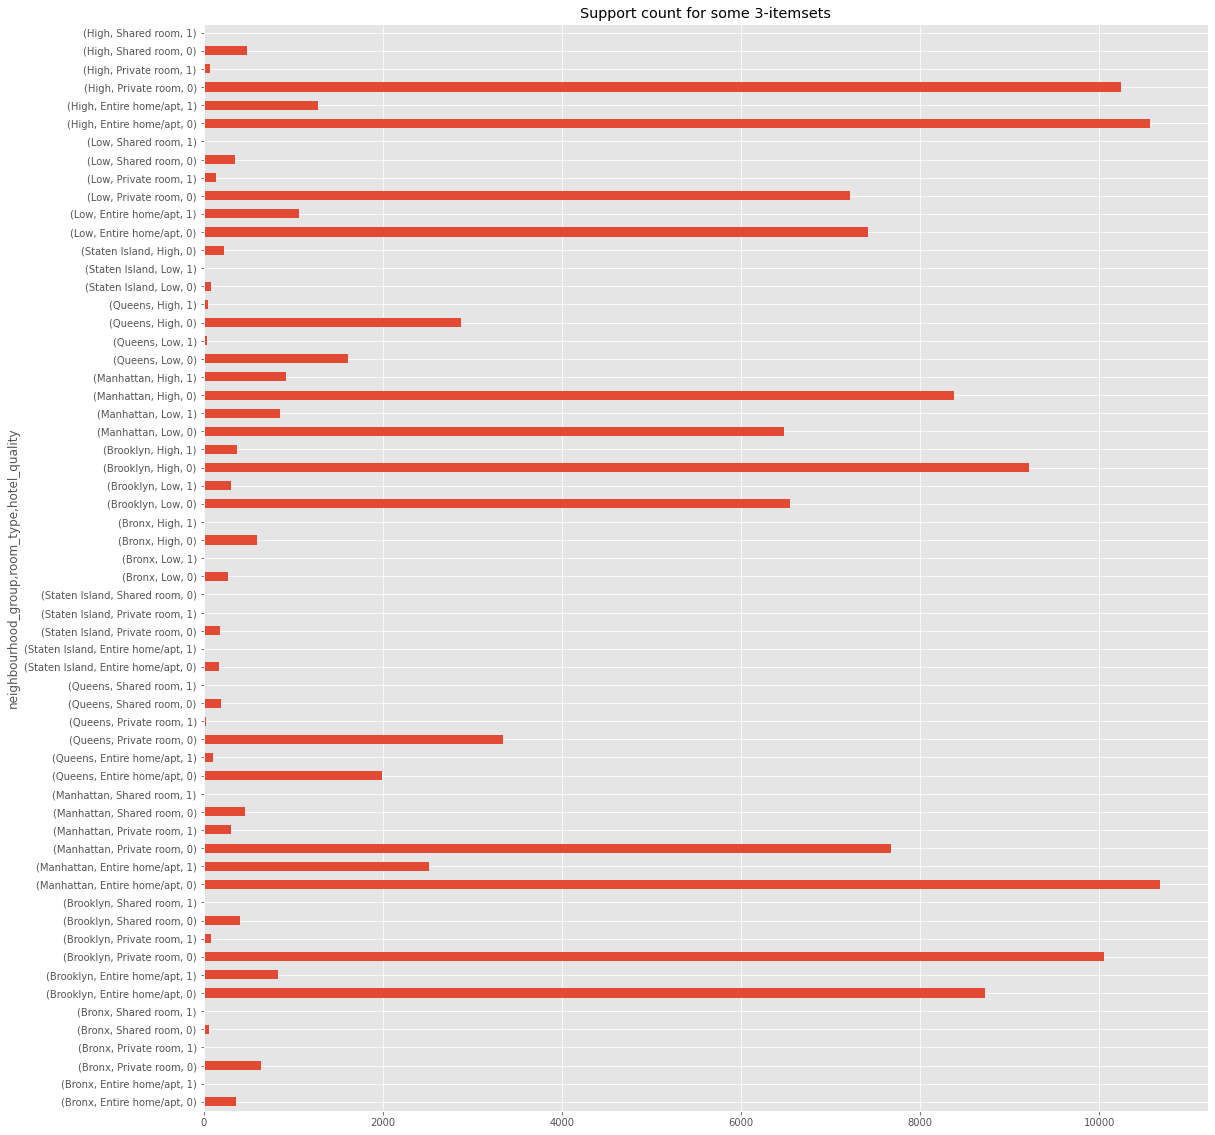

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv(r'https://raw.githubusercontent.com/thomaskarba/MachineLearningSMU/master/AB_NYC_2019.csv')

#preparing data, class
if 'price' in data.columns:
  data['hotel_quality'] = data.price>=300
  data.hotel_quality=data.hotel_quality.astype(np.int)
cut_labels_4 = ['Low', 'High']
cut_bins = [0, 6, 700]
data['reviews'] = pd.cut(data['number_of_reviews'], bins=cut_bins, labels=cut_labels_4)

plt.style.use('ggplot')

# find all the three itemsets and concat them
f = plt.figure(figsize=(18,20))
df_grouped = data.groupby(by=['neighbourhood_group','room_type'])
countsA = df_grouped.hotel_quality.value_counts()
df_grouped = data.groupby(by=['neighbourhood_group','reviews'])
countsB = df_grouped.hotel_quality.value_counts()
df_grouped = data.groupby(by=['reviews','room_type'])
countsC = df_grouped.hotel_quality.value_counts()

pd.concat((countsA,countsB,countsC)).plot(kind='barh')
plt.title('Support count for some 3-itemsets')

Here we are looking at the frequency of different itemsets that result in either the Airbnb listing being either above or below the average hotel price. We named this hotel_quality and it is represented as 1(High) or 0(Low). The items we are measuring are our categorical variables of neighbourhood_group (boroughs) and room_type (shared, private,entire home). We also created a categorical variable out of the number of reviews since that variable has shown in previous variable importance to have an effect on the Airbnb price. We used the median value (5) as our cutoff as shown in the EDA. 

Most of our listings are cheaper than the average hotel so many of the most frequent itemsets result in 0. Some of the more interesting points in this graph are (Manhattan, Entire home) --- 1. This is the most frequent itemset that results in a High price. This is probably due to the fact that Manhattan is the best borough in terms of tourists attractions, and tourists are the ones mostly using the Airbnb app. Also people would have to pay more for the entire home as opposed to only a single room. 

In [ ]:
%load_ext rmagic
%load_ext rpy2.ipython 

from rpy2 import robjects as robj

# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

packnames = ('arules', 'arulesViz')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))




/usr/local/lib/python3.6/dist-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')
R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘gdata’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘regist

In [ ]:
%R df <- read.csv(url("https://raw.githubusercontent.com/thomaskarba/MachineLearningSMU/master/AB_NYC_2019.csv"))
%R df$number_of_reviews <- cut(df$number_of_reviews,breaks = c(-1,6,700),labels = c("Low","High"))
%R df$hotel_quality <- cut(df$price,breaks = c(-1,300,100000),labels = c("Low","High"))
%R df <- subset(df, select = c(neighbourhood_group,number_of_reviews,room_type,hotel_quality) )

,neighbourhood_group,number_of_reviews,room_type,hotel_quality
1,Brooklyn,High,Private room,Low
2,Manhattan,High,Entire home/apt,Low
3,Manhattan,Low,Private room,Low
4,Brooklyn,High,Entire home/apt,Low
5,Manhattan,High,Entire home/apt,Low
...,...,...,...,...
48891,Brooklyn,Low,Private room,Low
48892,Brooklyn,Low,Private room,Low
48893,Manhattan,Low,Entire home/apt,Low
48894,Manhattan,Low,Shared room,Low


The dataset is reloaded as an R dataset so the apriori function can be used.

In [ ]:
%R library(arules)
%R rules <- apriori(df,parameter = list(minlen=1, supp=0.05, conf=0.1),appearance = list(rhs=c("hotel_quality=Low", "hotel_quality=High"), default="lhs"))
%R rules.sorted <- sort(rules, by="support")
%R inspect(rules.sorted)

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘arules’


R[write to console]: The following objects are masked from ‘package:base’:

    abbreviate, write




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2444 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[12 item(s), 48895 transaction(s)] done [0.03s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [33 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                                rhs                     support confidence   coverage      lift count
[1]  {}                              => {hotel_quality=Low}  0.93134267  0.9313427 1.00000000 1.0000000 45538
[2]  {number_of_reviews=Low}         => {hotel_quality=Low}  0.491

Here we set support and confidence low to try to find itemsets that results in a High hotel_listing. We see the highest support .061 for an entire home. This means that only 6.1% of our data are Airbnb listings for entire homes in with high pricing. The confidence is the our .061 support for Entire_home -- High divided by our support for Entire_home. This is equal to .117. The means thats only 12% of all entire home listings have high prices. This is obviously quite low considering entire home -- High is our most frequent occuring itemset resutling in High.

Coverage is simply our support/confidence. The next interesting metric to look at is lift. A lift of around 1 would indicate independence of each other. Lift of over 1 would indicate dependences and rule could form. A lift of less than 1 would indicate that the lhs has a negative impact on the rhs. Lift is calculated by the overall support of entire_home--High (.061) divided by support of entire_home multiplied by support of High. The lift for entire_home -- High is 1.708. This would indicate that in fact this entire_home has a great impact on whether or not a listing will be classified as High.

R[write to console]: Loading required package: grid

R[write to console]: Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



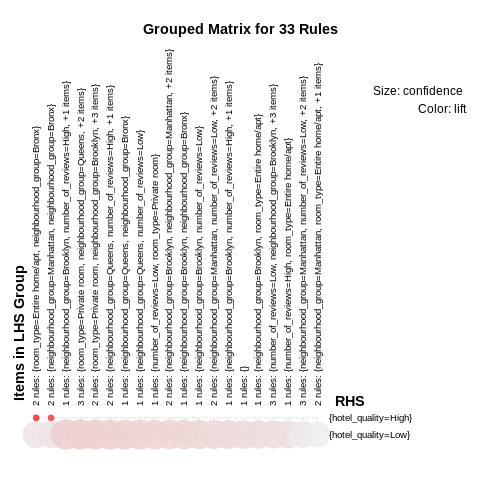

The Graphic for rules grouped by lift and their support


In [ ]:
%R library(arulesViz)
%R rules.sorted <- sort(rules, by="support")
%R fig.height =30
%R plot(rules.sorted, method="grouped", measure = 'confidence', shading='lift')
print('The Graphic for rules grouped by lift and their support')

The graph confirms what we already know from the above apriori section. That very few rules results in High hotel_quality. It also confirms that those rules have High lift, which is to say they are important itemsets in order for a High pricing. However, based on the size of them we see they have low confidence meaning they are not frequent within our dataset.


The Rules Association Mining was an interesting delve into our dataset. One thing it has highlighted is that there are very few itemsets in total that result in High pricing. This is due to the fact that very few hotel_quality values are in fact High. Another thing this has highlighted is the importance of a few variables in classifying hotel_quality as High. In future research it would be beneficial to have more correlated data with High pricing. Future variables like square footage instead of simply entire home, or positive/negative reviews instead of simply number of reviews. This extra granular data could help make stronger rules for classifying things as High price.